## Part 1: Fundamentals

### 6. Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [278]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1

In [279]:
# Read Data
# create a list of tickers
tickers = ['TSLA', 'AAPL', 'MSFT', 'ARKK', 'AMZN', 'GOOG', 'NFLX', 'NVDA', 'ETH-USD', 'BTC-USD']

test = data.DataReader(tickers, 'yahoo', start='2018/01/01', end='2022/10/31').dropna() # here we use yahoo finance to get the data. DataReader is a pandas function and the syntax is DataReader(tickers, data_source, start, end)
test.head()




Attributes  Adj Close                                                         \
Symbols          TSLA       AAPL       MSFT       ARKK       AMZN       GOOG   
Date                                                                           
2018-01-02  21.368668  41.018425  81.168495  36.354530  59.450500  53.250000   
2018-01-03  21.150000  41.011288  81.546242  36.505299  60.209999  54.124001   
2018-01-04  20.974667  41.201778  82.263977  36.627796  60.479500  54.320000   
2018-01-05  21.105333  41.670883  83.283875  37.221458  61.457001  55.111500   
2018-01-08  22.427334  41.516094  83.368874  36.967030  62.343498  55.347000   

Attributes                                                    ...  \
Symbols           NFLX       NVDA      ETH-USD       BTC-USD  ...   
Date                                                          ...   
2018-01-02  201.070007  49.347279   884.443970  14982.099609  ...   
2018-01-03  205.050003  52.595024   962.719971  15201.000000  ...   
2018-01-04  205.630005  52.872276   980.921997  15599.200195  ...   
2018-01-05  209.990005  53.320320   997.719971  17429.500000  ...   
2018-01-08  212.050003  54.954094  1148.530029  15170.099609  ...   

Attributes       Volume                                                 \
Symbols            TSLA         AAPL        MSFT      ARKK        AMZN   
Date                                                                     
2018-01-02   65283000.0  102223600.0  22483800.0  420000.0  53890000.0   
2018-01-03   67822500.0  118071600.0  26061400.0  667300.0  62176000.0   
2018-01-04  149194500.0   89738400.0  21912000.0  358600.0  60442000.0   
2018-01-05   68868000.0   94640000.0  23407100.0  361200.0  70894000.0   
2018-01-08  147891000.0   82271200.0  22113000.0  421100.0  85590000.0   

Attributes                                                                  
Symbols           GOOG        NFLX        NVDA       ETH-USD       BTC-USD  
Date                                                                        
2018-01-02  24752000.0  10966900.0  35561600.0  5.783350e+09  1.684660e+10  
2018-01-03  28604000.0   8591400.0  91470400.0  5.093160e+09  1.687190e+10  
2018-01-04  20092000.0   6029600.0  58326800.0  6.502860e+09  2.178320e+10  
2018-01-05  25582000.0   7033200.0  58012400.0  6.683150e+09  2.384090e+10  
2018-01-08  20952000.0   5580200.0  88121600.0  8.450970e+09  1.841390e+10  

[5 rows x 60 columns]

In [280]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Date,,,,,,,,,,
2018-01-02,21.368668,41.018425,81.168495,36.354530,59.450500,53.250000,201.070007,49.347279,884.443970,14982.099609
2018-01-03,21.150000,41.011288,81.546242,36.505299,60.209999,54.124001,205.050003,52.595024,962.719971,15201.000000
2018-01-04,20.974667,41.201778,82.263977,36.627796,60.479500,54.320000,205.630005,52.872276,980.921997,15599.200195
2018-01-05,21.105333,41.670883,83.283875,37.221458,61.457001,55.111500,209.990005,53.320320,997.719971,17429.500000
2018-01-08,22.427334,41.516094,83.368874,36.967030,62.343498,55.347000,212.050003,54.954094,1148.530029,15170.099609


In [281]:
# Drop na 
test = test.dropna()
test.head()

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Date,,,,,,,,,,
2018-01-02,21.368668,41.018425,81.168495,36.354530,59.450500,53.250000,201.070007,49.347279,884.443970,14982.099609
2018-01-03,21.150000,41.011288,81.546242,36.505299,60.209999,54.124001,205.050003,52.595024,962.719971,15201.000000
2018-01-04,20.974667,41.201778,82.263977,36.627796,60.479500,54.320000,205.630005,52.872276,980.921997,15599.200195
2018-01-05,21.105333,41.670883,83.283875,37.221458,61.457001,55.111500,209.990005,53.320320,997.719971,17429.500000
2018-01-08,22.427334,41.516094,83.368874,36.967030,62.343498,55.347000,212.050003,54.954094,1148.530029,15170.099609


Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

<AxesSubplot:xlabel='Symbols'>

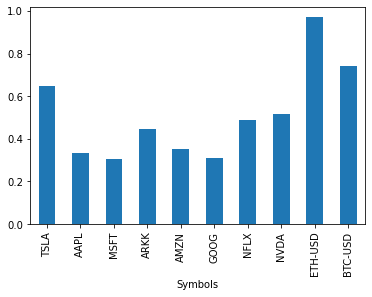

In [282]:
# Volatility of  stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [283]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x)).dropna()
test1.head()

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Date,,,,,,,,,,
2018-01-03,-0.010286,-0.000174,0.004643,0.004139,0.012694,0.016280,0.019601,0.063739,0.084803,0.014505
2018-01-04,-0.008325,0.004634,0.008763,0.003350,0.004466,0.003615,0.002825,0.005258,0.018730,0.025858
2018-01-05,0.006210,0.011321,0.012322,0.016078,0.016033,0.014466,0.020981,0.008438,0.016980,0.110945
2018-01-08,0.060755,-0.003721,0.001020,-0.006859,0.014322,0.004264,0.009762,0.030181,0.140766,-0.138838
2018-01-09,-0.008118,-0.000115,-0.000680,0.002037,0.004665,-0.000615,-0.013006,-0.000270,0.123681,-0.038620


In [309]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2 = test2.dropna()
test2.head()

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Date,,,,,,,,,,
2018-01-03,-0.010286,-0.000174,0.004643,0.004139,0.012694,0.016280,0.019601,0.063739,0.084803,0.014505
2018-01-04,-0.008325,0.004634,0.008763,0.003350,0.004466,0.003615,0.002825,0.005258,0.018730,0.025858
2018-01-05,0.006210,0.011321,0.012322,0.016078,0.016033,0.014466,0.020981,0.008438,0.016980,0.110945
2018-01-08,0.060755,-0.003721,0.001020,-0.006859,0.014322,0.004264,0.009762,0.030181,0.140766,-0.138838
2018-01-09,-0.008118,-0.000115,-0.000680,0.002037,0.004665,-0.000615,-0.013006,-0.000270,0.123681,-0.038620


Weights
Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

# input 2: 

In [310]:
# Define weights for allocation
w = [0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA       0.001945
AAPL       0.001084
MSFT       0.000864
ARKK       0.000042
AMZN       0.000447
GOOG       0.000473
NFLX       0.000306
NVDA       0.000827
ETH-USD    0.000473
BTC-USD    0.000258
dtype: float64

The total expected return for a portfolio is given by:

E(Rp)=w1E(R1)+w2E(R2)+…..wnE(Rn)
Thus, e_r, or total expected return can be calculated as:

In [311]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

0.0006721763182469783

### 7. Building an optimal risky portfolio
Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 3:

In [289]:
# Import data
df = data.DataReader(tickers, 'yahoo', start='2015/01/01', end='2022/10/31').dropna()
df.head()

Attributes  Adj Close                                                         \
Symbols          TSLA       AAPL       MSFT       ARKK       AMZN       GOOG   
Date                                                                           
2017-11-09  20.199333  41.730404  79.015144  32.244064  56.456501  51.563000   
2017-11-10  20.199333  41.592293  78.808434  32.281281  56.267502  51.403500   
2017-11-13  21.026667  41.425617  78.864792  32.420826  56.458500  51.287498   
2017-11-14  20.580000  40.799355  78.977585  32.104523  56.841999  51.299999   
2017-11-15  20.753332  40.261208  78.363716  32.188248  56.334499  51.045502   

Attributes                                                  ...       Volume  \
Symbols           NFLX       NVDA     ETH-USD      BTC-USD  ...         TSLA   
Date                                                        ...                
2017-11-09  193.899994  50.789825  320.884003  7143.580078  ...   81706500.0   
2017-11-10  192.020004  53.466354  299.252991  6618.140137  ...   69381000.0   
2017-11-13  195.080002  52.598091  316.716003  6559.490234  ...  113773500.0   
2017-11-14  195.710007  52.981514  337.631012  6635.750000  ...   85141500.0   
2017-11-15  192.119995  51.942558  333.356995  7315.540039  ...   89680500.0   

Attributes                                                             \
Symbols            AAPL        MSFT      ARKK        AMZN        GOOG   
Date                                                                    
2017-11-09  117930400.0  21178400.0  160800.0  74654000.0  24904000.0   
2017-11-10  100582000.0  19397800.0   98400.0  43598000.0  14400000.0   
2017-11-13   67928400.0  14196900.0   97600.0  58368000.0  17716000.0   
2017-11-14   99130000.0  18801300.0  161000.0  62768000.0  19184000.0   
2017-11-15  116632400.0  19383100.0  196300.0  78574000.0  17080000.0   

Attributes                                                      
Symbols          NFLX         NVDA       ETH-USD       BTC-USD  
Date                                                            
2017-11-09  5979900.0   97856400.0  8.932500e+08  3.226250e+09  
2017-11-10  6622200.0  125325600.0  8.859860e+08  5.208250e+09  
2017-11-13  4607000.0   58237600.0  1.041890e+09  6.263250e+09  
2017-11-14  3450500.0   52929200.0  1.069680e+09  3.197110e+09  
2017-11-15  4203100.0   50194800.0  7.226660e+08  4.200880e+09  

[5 rows x 60 columns]

In [290]:
# Closing price
df = df['Adj Close']
df.head()
df.to_csv('closing prices.csv')

### 8. Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [291]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Symbols,,,,,,,,,,
TSLA,0.001644,0.000398,0.000370,0.000716,0.000386,0.000326,0.000460,0.000626,0.000491,0.000352
AAPL,0.000398,0.000431,0.000307,0.000364,0.000293,0.000279,0.000293,0.000444,0.000307,0.000216
MSFT,0.000370,0.000307,0.000371,0.000359,0.000300,0.000298,0.000304,0.000445,0.000312,0.000227
ARKK,0.000716,0.000364,0.000359,0.000773,0.000398,0.000344,0.000488,0.000644,0.000536,0.000413
AMZN,0.000386,0.000293,0.000300,0.000398,0.000485,0.000289,0.000403,0.000456,0.000301,0.000225
GOOG,0.000326,0.000279,0.000298,0.000344,0.000289,0.000374,0.000297,0.000417,0.000292,0.000209
NFLX,0.000460,0.000293,0.000304,0.000488,0.000403,0.000297,0.000936,0.000499,0.000345,0.000254
NVDA,0.000626,0.000444,0.000445,0.000644,0.000456,0.000417,0.000499,0.001048,0.000530,0.000390
ETH-USD,0.000491,0.000307,0.000312,0.000536,0.000301,0.000292,0.000345,0.000530,0.003895,0.002318


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [292]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,ETH-USD,BTC-USD
Symbols,,,,,,,,,,
TSLA,1.000000,0.472634,0.473470,0.635240,0.432026,0.416404,0.371201,0.476538,0.194170,0.180443
AAPL,0.472634,1.000000,0.767381,0.631394,0.641827,0.694258,0.461451,0.660159,0.237081,0.215704
MSFT,0.473470,0.767381,1.000000,0.669782,0.707802,0.800144,0.515401,0.714317,0.259773,0.245328
ARKK,0.635240,0.631394,0.669782,1.000000,0.650390,0.640845,0.573527,0.716051,0.308842,0.308814
AMZN,0.432026,0.641827,0.707802,0.650390,1.000000,0.678649,0.598285,0.640211,0.219030,0.212431
GOOG,0.416404,0.694258,0.800144,0.640845,0.678649,1.000000,0.501615,0.665386,0.242050,0.224668
NFLX,0.371201,0.461451,0.515401,0.573527,0.598285,0.501615,1.000000,0.503430,0.180608,0.172255
NVDA,0.476538,0.660159,0.714317,0.716051,0.640211,0.665386,0.503430,1.000000,0.262218,0.250213
ETH-USD,0.194170,0.237081,0.259773,0.308842,0.219030,0.242050,0.180608,0.262218,1.000000,0.771533


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [293]:
1/12

0.08333333333333333

In [294]:
tickers


['TSLA',
 'AAPL',
 'MSFT',
 'ARKK',
 'AMZN',
 'GOOG',
 'NFLX',
 'NVDA',
 'ETH-USD',
 'BTC-USD']

# input 4:

In [312]:
# Randomly weighted portfolio's variance
w = {'TSLA': 0.1, 'AAPL': 0.1, 'MSFT': 0.1, 'ARKK': 0.1, 'AMZN': 0.1, 'GOOG': 0.1, 'NFLX': 0.1, 'NVDA': 0.1, 'ETH-USD': 0.1, 'BTC-USD': 0.1}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0005011327894841742

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

### 9. Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [313]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
TSLA       1.580753
AAPL       0.374469
MSFT       0.285672
ARKK       0.216772
AMZN       0.183075
GOOG       0.179400
NFLX       0.174599
NVDA       0.479655
ETH-USD    1.451933
BTC-USD    0.649659
dtype: float64

# input 5:

In [314]:
# Portfolio returns
w = [ 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1, ]
port_er = (w*ind_er).sum()
port_er

0.557598729492985

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [315]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
TSLA       0.641035
AAPL       0.328174
MSFT       0.304542
ARKK       0.439504
AMZN       0.348145
GOOG       0.305772
NFLX       0.483652
NVDA       0.511962
ETH-USD    0.986742
BTC-USD    0.761117
dtype: float64

In [316]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
TSLA,1.580753,0.641035
AAPL,0.374469,0.328174
MSFT,0.285672,0.304542
ARKK,0.216772,0.439504
AMZN,0.183075,0.348145
GOOG,0.179400,0.305772
NFLX,0.174599,0.483652
NVDA,0.479655,0.511962
ETH-USD,1.451933,0.986742


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

### Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [317]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [318]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [319]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [320]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,TSLA weight,AAPL weight,MSFT weight,ARKK weight,AMZN weight,GOOG weight,NFLX weight,NVDA weight,ETH-USD weight,BTC-USD weight
0,0.434374,0.335145,0.082912,0.137114,0.017842,0.165068,0.169798,0.094395,0.182527,0.042528,0.050799,0.057017
1,0.447273,0.329757,0.047907,0.146602,0.189207,0.069929,0.038914,0.123379,0.144547,0.038493,0.054694,0.146329
2,0.511307,0.362376,0.081923,0.052175,0.182852,0.032095,0.027823,0.048669,0.183388,0.138941,0.033389,0.218744
3,0.571540,0.341387,0.153185,0.191481,0.134864,0.167408,0.085408,0.074054,0.001946,0.037299,0.044178,0.110177
4,0.557559,0.370049,0.025470,0.169729,0.171889,0.030572,0.157716,0.117804,0.009961,0.019729,0.179196,0.117934


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

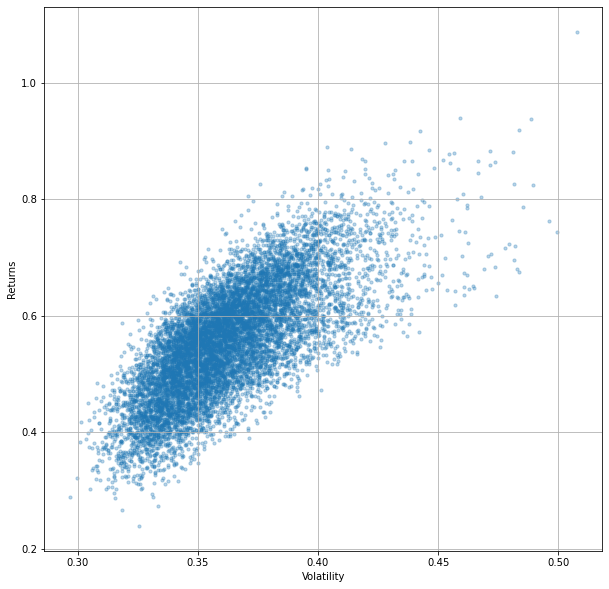

In [321]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [322]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.289471
Volatility        0.296509
TSLA weight       0.021330
AAPL weight       0.056443
MSFT weight       0.241554
ARKK weight       0.040886
AMZN weight       0.199364
GOOG weight       0.216169
NFLX weight       0.127204
NVDA weight       0.031216
ETH-USD weight    0.001892
BTC-USD weight    0.063942
Name: 4017, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

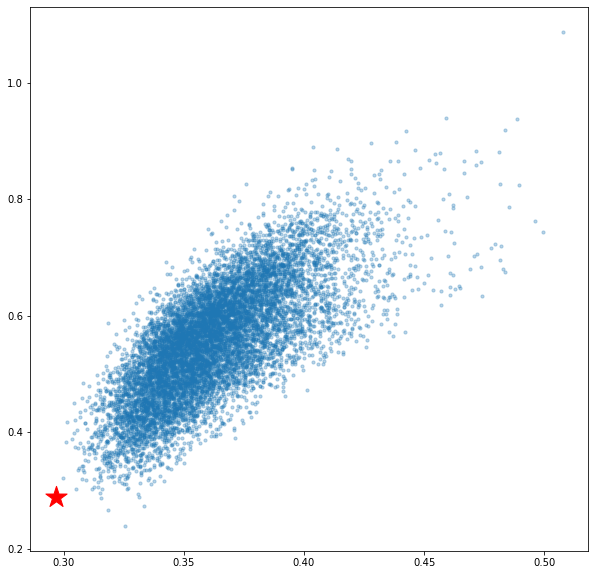

In [323]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [329]:
optimal_risky_port1 = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port1
# drop the two rows with the lowest weights
optimal_risky_port1 = optimal_risky_port1.drop(['NFLX weight', 'ARKK weight'])
optimal_risky_port1

Returns           0.889549
Volatility        0.403678
TSLA weight       0.288359
AAPL weight       0.156678
MSFT weight       0.027236
AMZN weight       0.069618
GOOG weight       0.085945
NVDA weight       0.165350
ETH-USD weight    0.170998
BTC-USD weight    0.009536
Name: 214, dtype: float64

In [332]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns           0.889549
Volatility        0.403678
TSLA weight       0.288359
AAPL weight       0.156678
MSFT weight       0.027236
ARKK weight       0.017471
AMZN weight       0.069618
GOOG weight       0.085945
NFLX weight       0.008809
NVDA weight       0.165350
ETH-USD weight    0.170998
BTC-USD weight    0.009536
Name: 214, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

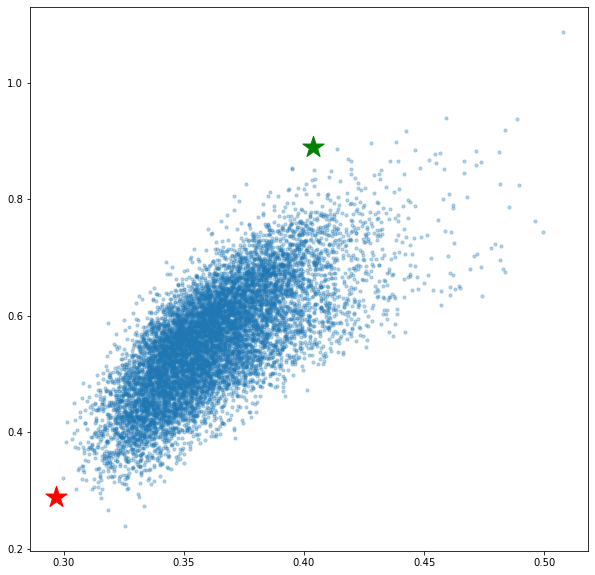

In [333]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)